DESCRIPTION

You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

 

Note: Download 311-service-requests-nyc.zip file using the link given in the Customer Service Requests Analysis project problem statement and extract the 311_Service_Requests_from_2010_to_Present.csv file

 

Perform the following steps:

Understand the dataset:
Identify the shape of the dataset
Identify variables with null values
2. Perform basic data exploratory analysis:

Utilize missing value treatment
Analyze the date column and remove the entries if it has an incorrect timeline
Draw a frequency plot for city-wise complaints
Draw scatter and hexbin plots for complaint concentration across Brooklyn
3. Find major types of complaints:

Plot a bar graph of count vs. complaint types
Find the top 10 types of complaints
Display the types of complaints in each city in a separate dataset
 

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [1]:
from pandas import read_csv, DataFrame, to_datetime, to_timedelta, crosstab
import numpy as np  #,arange, concatenate #, array, mean, median, sort
# from scipy.stats import mode
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
#github copilot code completer

In [11]:
csrdat = read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)
# print('shape of the dataset:',csrdat.shape)
#shape of the dataset: (364558, 53)
# print('Variables with null values:\n',(nulcsr.index)[nulcsr])

## by data inspection and number of unique entities per feature, below of them are dropped

In [12]:
# missing values treatment
valcntlen = [(cln, len(csrdat[cln].value_counts())) for cln in csrdat.columns]
dropables = [f[0] for f in tuple(filter(lambda ic: ic[1]<7, valcntlen))] + ['Unique Key','Landmark']
np.array(dropables)

array(['Agency', 'Agency Name', 'Address Type', 'Facility Type', 'Status',
       'Borough', 'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Road Ramp',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name',
       'Unique Key', 'Landmark'], dtype='<U28')

In [11]:
#np.array(valcntlen)

In [13]:
#np.unique(csrdat.isna().any().values == csrdat.isnull().any().values)
#Relying on csrdat.isnull().sum(), eliminate the columns greater than 10000
csrdat.drop(dropables, axis=1,inplace=True)
nulcsr = csrdat.isnull().any()
csrdat.drop(list(nulcsr.index[ csrdat.isnull().sum().values > 10000]), axis=1, inplace=True)
csrdat.dropna(inplace=True) # also dropping 2381 open entries which are not yet resolved
# csrdat.shape is (353617, 25) 

## Date and time columns contain equal entries which are valid data and cannot be taken as incorrect timeline

In [5]:
# Very high time consuming dateTime operations
# cdt = to_datetime(arg = csrdat['Created Date'])
# edt = to_datetime(arg = csrdat['Closed Date'])
csrdat['Created Date'] = to_datetime(arg = csrdat['Created Date'])
csrdat['Closed Date'] = to_datetime(arg = csrdat['Closed Date'])
#csrdat.to_csv('csr_refined.csv')
### cdti = to_datetime(cdt.reset_index()['Created Date'])
### tmln = np.array([cdti[i] == cdti[i+1]  for i in cdti.index[:-1]], dtype=bool) 

Text(0, 0.5, 'City')

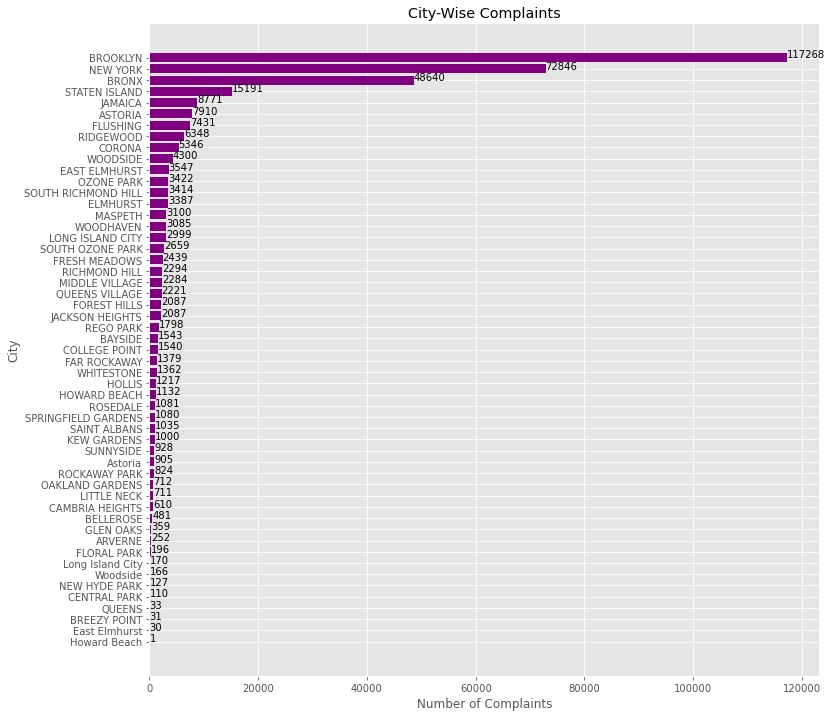

In [14]:
plt.figure(figsize=(12,12))
cty_comp = csrdat[['Complaint Type','City']]
xindx = cty_comp.groupby(['City']).count().index
ycnt = np.ravel(cty_comp.groupby(['City']).count().values)
srtind = np.argsort(ycnt)
plt.barh(xindx[srtind],ycnt[srtind], color='purple')
for inx,val in enumerate(ycnt[srtind]):
    plt.text(val,inx,str(val))
plt.title('City-Wise Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('City')

#sns.barplot(x = cty_comp.groupby(['City']).count().index,
#y=np.ravel(cty_comp.groupby(['City']).count().values), orient="v")

## Zip  10023, 11103, 11385, 11414 does not belong to BROOKLYN city and will be dropped

[Reference]http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?zip=112

Text(0, 0.5, 'Number of Complaints')

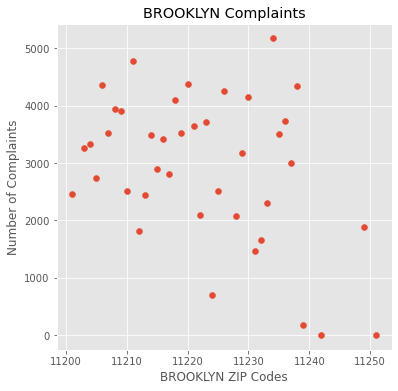

In [20]:
#hexbin plot
#.plot.hexbin(x='x', y='y', gridsize=20) np.array(plt.colormaps())
#zips = ((csrdat['Incident Zip'][csrdat.City == 'BROOKLYN']).unique()).astype(int)
zip_comp= csrdat[['Incident Zip', 'Complaint Type']][csrdat.City == 'BROOKLYN'].groupby(['Incident Zip'])
xzips = ((zip_comp.count().index).astype(int))[2:-2]
ycomps = (((zip_comp.count().values).T)[0])[2:-2]
zc = DataFrame({'zip_Complaints':((zip_comp.count().index).astype(int))[2:-2],
                'Compliant_Numbers': (((zip_comp.count().values).T)[0])[2:-2] })
# zc.plot.hexbin(x='xzips', y='ycomps', gridsize=15)
# zip_comp.count()
plt.figure(figsize=(6,6))
plt.scatter(x=xzips, y=ycomps)
plt.title('BROOKLYN Complaints Concentration')
plt.xlabel('BROOKLYN ZIP Codes')
plt.ylabel('Number of Complaints')

In [18]:
xzips

Int64Index([11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210,
            11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
            11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229,
            11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238,
            11239, 11242, 11249, 11251, 11385, 11414],
           dtype='int64', name='Incident Zip')

Text(27.0, 0.5, 'Number of Complaints')

<Figure size 720x720 with 0 Axes>

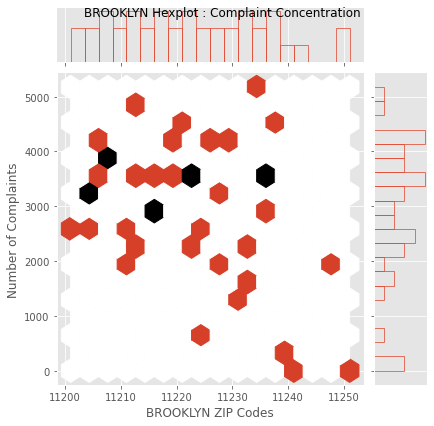

In [29]:
plt.figure(figsize=(10,10))
g = sns.jointplot(data=zc, x="zip_Complaints", y="Compliant_Numbers", kind="hex", 
                  marginal_kws=dict(bins=20, fill=False), joint_kws=dict(gridsize=15))
g.fig.suptitle('BROOKLYN Hexplot : Complaint Concentration')
plt.xlabel('BROOKLYN ZIP Codes')
plt.ylabel('Number of Complaints')

Text(0, 0.5, 'Number of Complaints')

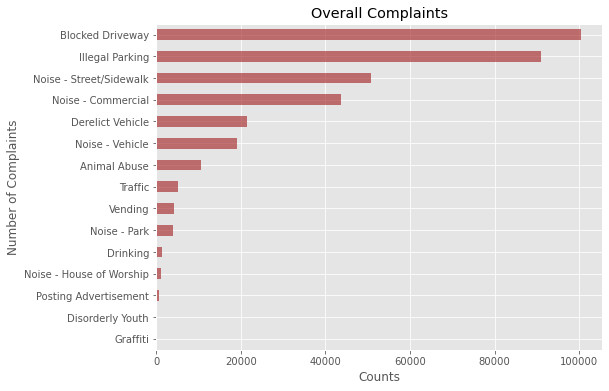

In [30]:
plt.figure(figsize=(8,6))
csrdat['Complaint Type'].value_counts(ascending=True).plot(kind='barh',color='brown',alpha=.65)
#overall complaints
plt.title('Overall Complaints')
plt.xlabel('Counts')
plt.ylabel('Number of Complaints')

In [31]:
# from re import split
# spldt = list( map( lambda dt: split(" ",str(dt)), created_Date) )
#csrdat['Closed Date'][10] - csrdat['Created Date'][10]
(csrdat['Complaint Type'].value_counts())[:10]

Blocked Driveway           100454
Illegal Parking             91056
Noise - Street/Sidewalk     50791
Noise - Commercial          43623
Derelict Vehicle            21419
Noise - Vehicle             19122
Animal Abuse                10500
Traffic                      5161
Vending                      4162
Noise - Park                 3994
Name: Complaint Type, dtype: int64

In [6]:
cts = csrdat.City.unique()
cty_comp_counts = DataFrame(dict(map(
    lambda ct:( ct, csrdat['Complaint Type'][csrdat.City == ct ].value_counts() ) , cts)), dtype=np.int64)
cty_comp_counts.replace(np.nan,0, inplace=True)
cty_comp_counts.convert_dtypes()
cty_comp_counts['Complaints'] = cty_comp_counts.index

<Figure size 1080x1080 with 0 Axes>

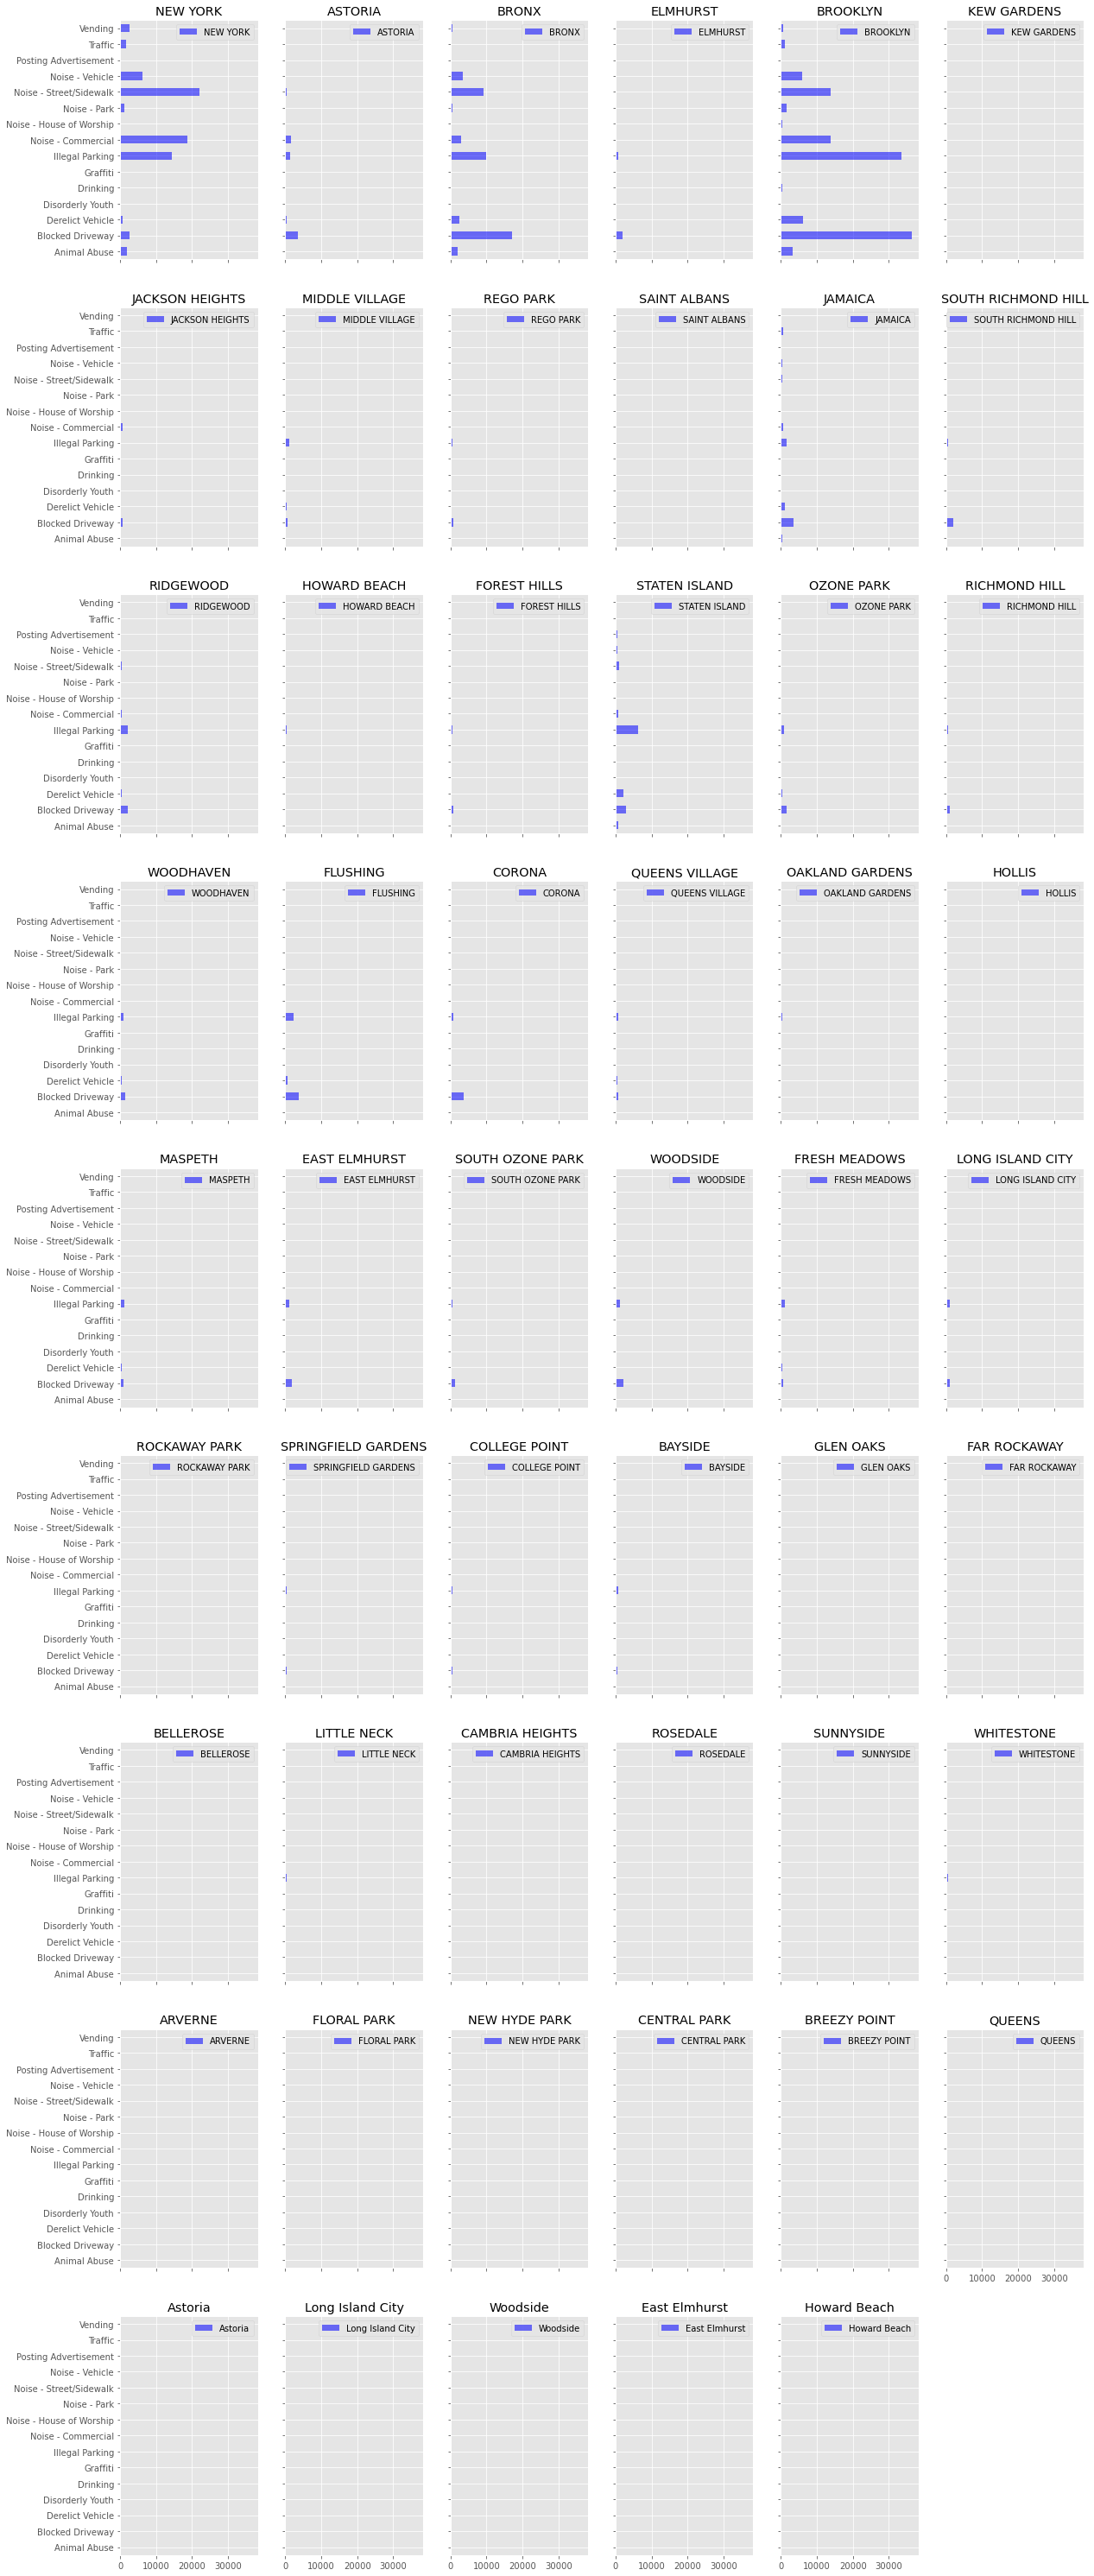

In [7]:
# plt.barh(cty_comp_counts.Complaints, cty_comp_counts.BRONX ,color='b',alpha=.55)
plt.figure(figsize=(15,15))
cty_comp_counts.plot(kind='barh',color='b',alpha=0.55, sort_columns=True, 
                     subplots=True, sharey=True, layout=(9,6), figsize=(20,54) )
#plt.savefig('City_complaint.jpg', dpi=200)
#figure, axes = plt.subplots(6, 9, figsize=(15,15), constrained_layout=True, sharey=True)
#figure.suptitle('Geeksforgeeks - 3 x 4 axes with no data')

<AxesSubplot:xlabel='Complaint Type', ylabel='City'>

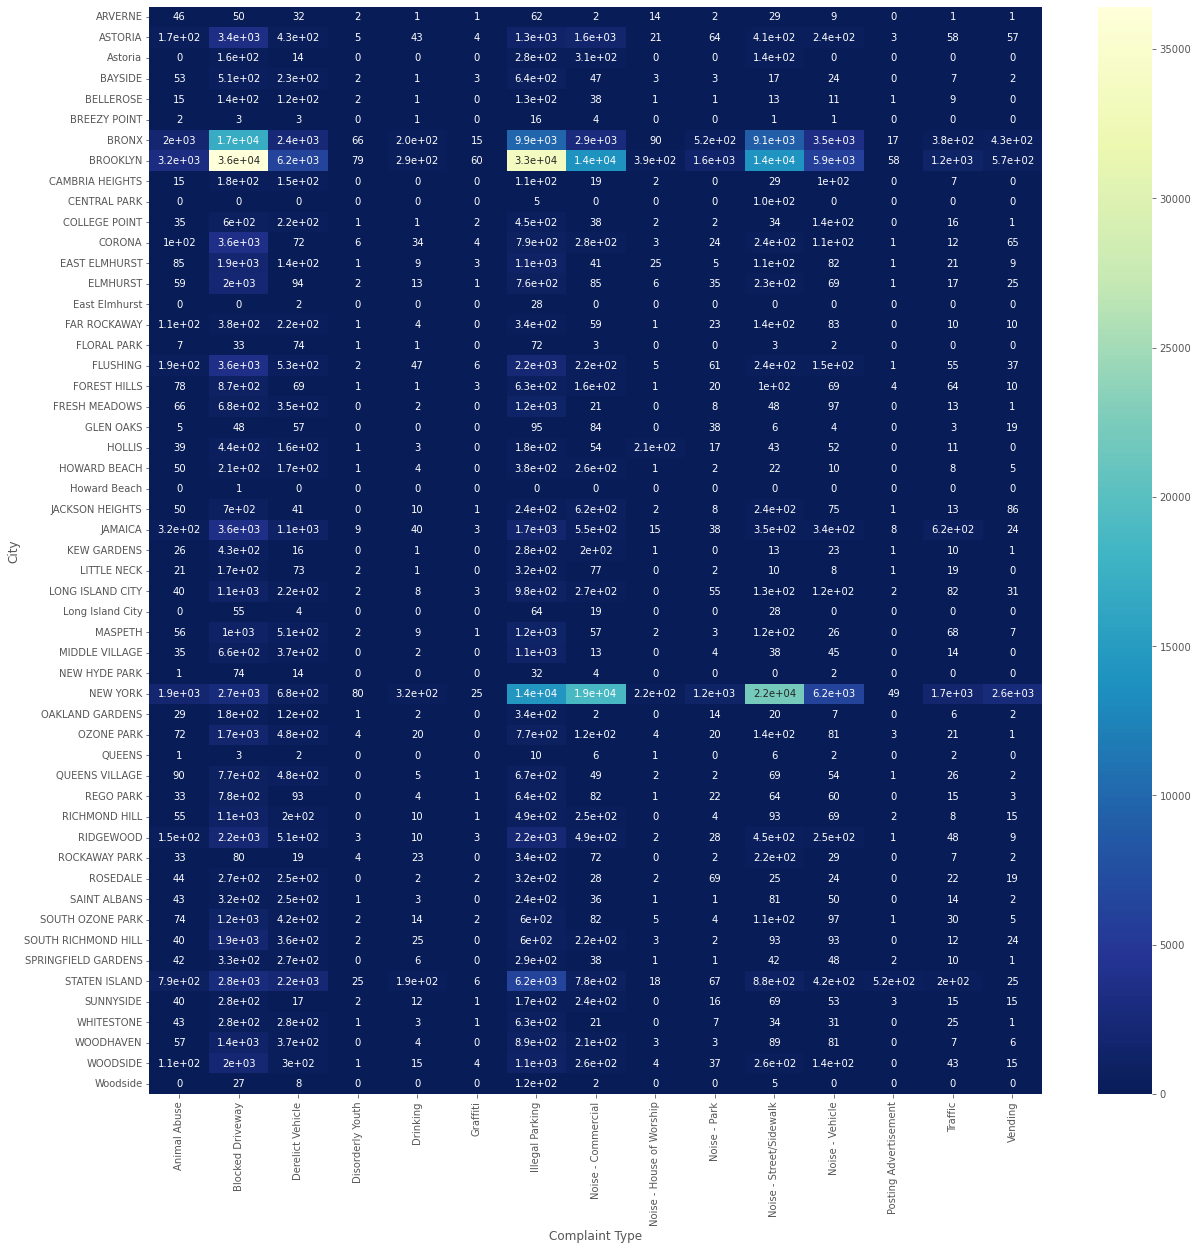

In [6]:
con = crosstab(csrdat['City'], csrdat['Complaint Type'])
plt.figure(figsize=(20,20)) 
sns.heatmap(con, annot=True, cmap="YlGnBu_r")

# There are 2405 entries having equal times for the registered compliants & they are not incorrect timelines

In [37]:
# average response time across various types of complaints is about 4 hours
Complaint_Response_Time = to_timedelta(arg=(csrdat['Closed Date'] - csrdat['Created Date']), unit='hour')
Complaint_Response_Time.describe()
# csrdat['Complaint_Resolution_Time_(h)'].describe()
# (csrdat['Complaint_Resolution_Time_(h)']/np.timedelta64(1, 'h')).describe()

count                       353889
mean     0 days 04:11:24.118624766
std      0 days 05:50:01.943764169
min                0 days 00:01:01
25%                0 days 01:15:31
50%                0 days 02:40:05
75%                0 days 05:13:55
max               24 days 16:52:22
dtype: object

In [26]:
from statsmodels.api import OLS
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## p-values and chi-square values both are calulated for categorical variables compatability.
## Here I have used 'City' & 'Complaint Type' features to get chi-square and p-value
### This can be looped over all the categorical variables by using select_dtypes(include=object) method.

In [80]:
csrdat1 = read_csv('csr_refined.csv')
Complaint_Response_Time = to_timedelta(arg=(csrdat['Closed Date'] - csrdat['Created Date']), unit='hour')
csrdat1['Complaint_Response_Time'] = Complaint_Response_Time/np.timedelta64(1, 'h')
con = crosstab(csrdat1['City'], csrdat1['Complaint Type'])
c, p, dof, expected = chi2_contingency(con)
print('chi2:',c,'p:', p)

chi2: 125812.6632561129 p: 0.0


## The one-hot-encoding multiplies the number of features, I will try with lable-encoding

In [81]:
# converting categorial variables to numbers by get_dummies onehot encoding method or label encoding
csrdat_encoded = csrdat1.drop(['Unnamed: 0','Created Date','Closed Date','Due Date','Resolution Action Updated Date','Location'], axis=1)
cols_encode = csrdat_encoded.select_dtypes(include=object).columns
# for obj in cols_encode :
#     csrdat_encoded[obj] = csrdat_encoded[obj].astype(str)
csrdat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353889 entries, 0 to 353888
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Complaint Type              353889 non-null  object 
 1   Descriptor                  353889 non-null  object 
 2   Location Type               353889 non-null  object 
 3   Incident Zip                353889 non-null  float64
 4   City                        353889 non-null  object 
 5   Resolution Description      353889 non-null  object 
 6   Community Board             353889 non-null  object 
 7   X Coordinate (State Plane)  353889 non-null  float64
 8   Y Coordinate (State Plane)  353889 non-null  float64
 9   Latitude                    353889 non-null  float64
 10  Longitude                   353889 non-null  float64
 11  Complaint_Response_Time     343398 non-null  float64
dtypes: float64(6), object(6)
memory usage: 32.4+ MB


In [82]:
[(cln,len(csrdat_encoded[cln].value_counts())) for cln in cols_encode]

[('Complaint Type', 15),
 ('Descriptor', 41),
 ('Location Type', 14),
 ('City', 53),
 ('Resolution Description', 11),
 ('Community Board', 72)]

In [83]:
le = LabelEncoder()
csrdat_encoded[cols_encode] = csrdat_encoded[cols_encode].apply(le.fit_transform)

In [84]:
x, y = csrdat_encoded.drop(['Complaint_Response_Time','X Coordinate (State Plane)','Y Coordinate (State Plane)','Latitude','Longitude'],axis=1), csrdat_encoded.Complaint_Response_Time
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state=0)
model1 = OLS(y_train, x_train)

In [85]:
model = model1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Complaint_Response_Time   R-squared (uncentered):                     nan
Model:                                 OLS   Adj. R-squared (uncentered):                nan
Method:                      Least Squares   F-statistic:                                nan
Date:                     Sun, 16 Oct 2022   Prob (F-statistic):                         nan
Time:                             18:04:12   Log-Likelihood:                             nan
No. Observations:                   106166   AIC:                                        nan
Df Residuals:                       106159   BIC:                                        nan
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Complaint Type                nan        nan        nan        nan         nan         nan
Descriptor                    nan        nan        nan        nan         nan         nan
Location Type                 nan        nan        nan        nan         nan         nan
Incident Zip                  nan        nan        nan        nan         nan         nan
City                          nan        nan        nan        nan         nan         nan
Resolution Description        nan        nan        nan        nan         nan         nan
Community Board               nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     5.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# CODE TRIALS & EXTRA CHECKS

In [ ]:
#cty_comp_counts.head()
# tips = sns.load_dataset("exercise")
# tips.head()
# plt.figure(figsize=(5,5))
# [(csrdat['Complaint Type'][csrdat['City'] == cty]).value_counts().plot(kind='bar',color='r', alpha=0.7) for cty in csrdat['City'].unique()]

In [93]:
# dtt = np.array(spldt).T
# dtt[0] < dtt[1]
#np.unique(list(map(lambda pv:created_Date[pv] < closed_date[pv], np.arange(0,len(created_Date)))))
# print(np.unique(created_Date == 'NaT'), np.unique(closed_date == 'NaT'))
# print(np.unique(created_Date == 'NaT'), np.unique(closed_date == 'NaT'))
#
#[p for p in csrdat.index][280:285]
#np.unique([(created_Date[p] < closed_date[p] ) for p in csrdat.index])
#np.unique(list(map(lambda pv:created_Date[pv] < closed_date[pv], csrdat.index)))


In [23]:
print(csrdat['Agency'].unique(),csrdat['Agency Name'].unique(),csrdat['Incident Zip'].unique())
print(len(csrdat['Incident Zip'].unique()),csrdat['City'].unique(),len(csrdat['City'].unique()))
#[(itm, csrdat[itm].dtype) for itm in (nulcsr.index)[nulcsr]]
#print('shape of the dataset:',nulcsr.index[nulcsr.values])
#(csrdat.isnull().sum())[~nulcsr]
#(csrdat.isnull().sum())[nulcsr]

['NYPD'] ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau'] [10034. 11105. 10458. 10461. 11373. 11215. 10032. 10457. 11415. 11219.
 11372. 10453. 11208. 11379. 11374. 11412. 11217. 11234. 10026. 10456.
 10030. 10467. 11432. 10031. 11419. 10024. 11201. 11216. 10462.    nan
 11385. 11414. 11213. 11375. 11211. 10312. 10017. 11417. 10002. 10027.
 11209. 10035. 11418. 11421. 11205. 10468. 11355. 11358. 11210. 11368.
 11427. 11436. 10308. 11364. 10011. 11423. 11230. 10003. 11221. 11416.
 11378. 11236. 11218. 10029. 10028. 11214. 11207. 11369. 11223. 11220.
 10302. 11420. 11354. 10473. 10301. 11103. 10465. 11377. 11212. 11365.
 10472. 10452. 11203. 10469. 11237. 11434. 11101. 10460. 11229. 11206.
 11102. 10466. 10009. 10033. 11694. 10022. 10470. 11433. 11428. 11413.
 10463. 10471. 10474. 11228. 10014. 10475. 11225. 11233. 11370. 11204.
 11435. 10459. 11238. 10304. 11367. 10306. 10305. 10001. 10314. 10019.
 11222. 10023. 11356. 11235. 10018. 10036. 11106. 10075. 10025. 10451.

In [36]:
#print(csrdat.columns)
#print(csrdat.info)
print(csrdat.isnull().sum())
#print(csrdat.isnull().sum())

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [20]:
infocsr = csrdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

TypeError: 'NoneType' object is not subscriptable

In [27]:
csrdat.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [17]:
#csrdat[csrdat == 'Unspecified'].sum() hanged 
#cdt = csrdat['Created Date']
edt = csrdat['Closed Date']
cdti = to_datetime(edt.reset_index()['Closed Date'])
#cdti0, cdti1 = cdti[:-1], cdti[1:]
tmln = np.array([cdti[i] == cdti[i+1]  for i in cdti.index[:-1]], dtype=bool) #2405

In [18]:
#print(np.concatenate(~tmln,0))
#cdti[len(cdti)-2] > cdti[len(cdti)-1]
#cdti[np.append(~tmln,[False], axis=0)]
print(tmln.sum())
cdti[np.append(tmln,[False], axis=0)]

663


1118     2015-12-30 22:56:03+00:00
2024     2015-12-31 10:11:52+00:00
2716     2015-12-28 20:03:19+00:00
2843     2015-12-28 18:45:08+00:00
3315     2015-12-27 23:38:14+00:00
                    ...           
353005   2015-01-01 22:56:14+00:00
353017   2015-01-01 23:00:46+00:00
353123   2015-01-01 20:07:26+00:00
353128   2015-01-01 19:14:54+00:00
353501   2015-01-01 05:52:35+00:00
Name: Closed Date, Length: 663, dtype: datetime64[ns, UTC]

In [11]:
csrdat['Created Date'][352558:352563]

363477   2015-02-01 15:56:21+00:00
363478   2015-02-01 15:55:49+00:00
363479   2015-02-01 15:55:28+00:00
363480   2015-02-01 15:55:28+00:00
363481   2015-02-01 15:53:12+00:00
Name: Created Date, dtype: datetime64[ns, UTC]

In [15]:
(csrdat['Incident Zip'][csrdat.City == 'BROOKLYN']).unique()

array([11215., 11219., 11208., 11217., 11234., 11201., 11216., 11213.,
       11211., 11209., 11205., 11210., 11230., 11221., 11236., 11218.,
       11214., 11207., 11223., 11220., 11212., 11203., 11237., 11229.,
       11206., 11228., 11225., 11233., 11204., 11238., 11222., 11235.,
       11226., 11224., 11249., 11232., 11231., 11239., 11251., 11242.,
       11385., 11414.])

In [17]:
# ccc = cty_comp_counts
# ccc.sort_values
# ccc.convert_dtypes().head()

In [5]:
csrdat['Complaint Type'][csrdat.City == 'BROOKLYN' ].value_counts()

Blocked Driveway            36414
Illegal Parking             33446
Noise - Street/Sidewalk     13943
Noise - Commercial          13847
Derelict Vehicle             6239
Noise - Vehicle              5932
Animal Abuse                 3185
Noise - Park                 1557
Traffic                      1203
Vending                       574
Noise - House of Worship      387
Drinking                      291
Disorderly Youth               79
Graffiti                       60
Posting Advertisement          58
Name: Complaint Type, dtype: int64

In [21]:
# def city_comps(ct):
#     ct_comp = csrdat['Complaint Type'][csrdat.City == ct ]
#     return [ct_comp.value_counts().index.tolist(), ct_comp.value_counts().values.tolist()]

In [ ]:
#np.array(plt.colormaps)